# Fake News Detection

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.model_selection import KFold, cross_val_score

## Data preprocessing

In [2]:
data = pd.read_csv('WELFake_Dataset.csv')
data.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


### Dealing with the missiing values

In [3]:
data.isna().any()

Unnamed: 0    False
title          True
text           True
label         False
dtype: bool

In [4]:
data.dropna(subset=['title', 'text'], inplace= True)
data.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1


In [5]:
data.isna().any()

Unnamed: 0    False
title         False
text          False
label         False
dtype: bool

### Checking the data distribution

<Axes: >

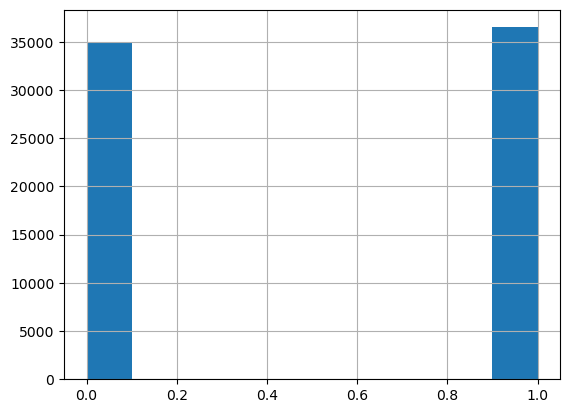

In [6]:
data = data[['text', 'label']]
data.head
data['label'].hist()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size = 0.2, random_state = 0)

## Vectorizing the text data

In [8]:
featurizer = TfidfVectorizer(decode_error='ignore')
X_train = featurizer.fit_transform(X_train)
X_test = featurizer.transform(X_test)

## Modeling

In [9]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

## Evaluating the model

In [10]:
cm_test = confusion_matrix(y_test, y_pred)
print(cm_test)

[[6531  432]
 [ 347 6998]]


In [11]:
acc = accuracy_score(y_test, y_pred)
print(acc)

0.9455549343024882


In [12]:
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = KFold(n_splits= 5))
print(f"Average Accuracy: {accuracies.mean()*100: .2f}%")
print(f"Standard Deviation of Accuracy: {accuracies.std()*100: .2f}%")

Average Accuracy:  94.27%
Standard Deviation of Accuracy:  0.17%


In [13]:
f1s = f1_score(y_test, y_pred)
print(f1s)

0.9472758037225042


In [14]:
roc = roc_auc_score(y_test, y_pred)
print(roc)

0.9453573771780373


## Generating the ROC Curve

In [15]:
y_score = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

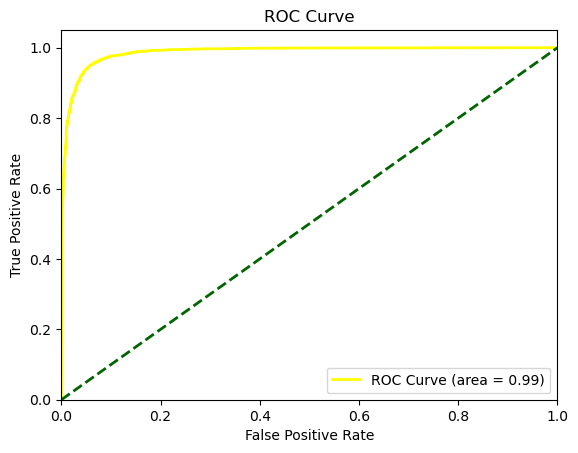

In [16]:
plt.figure()
plt.plot(fpr, tpr, color = 'yellow', lw = 2, label = f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color = 'darkgreen', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc = "lower right")
plt.show()